#### **Note:** This notebook is going to be updated soon with proper documentation

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


In [7]:
def my_softmax(z):
    ez = np.exp(z)
    sm = np.sum(ez)
    return (ez/sm)

In [8]:
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

my_softmax(z):         [0.0320586  0.08714432 0.23688282 0.64391426]
tensorflow softmax(z): [0.0320586  0.08714432 0.23688282 0.64391426]


In [9]:
X = np.load("X.npy")
print(f"Shape of X: {X.shape}")
y = np.load("y.npy")
print(f"Shape of y: {y.shape}")


Shape of X: (5000, 400)
Shape of y: (5000, 1)


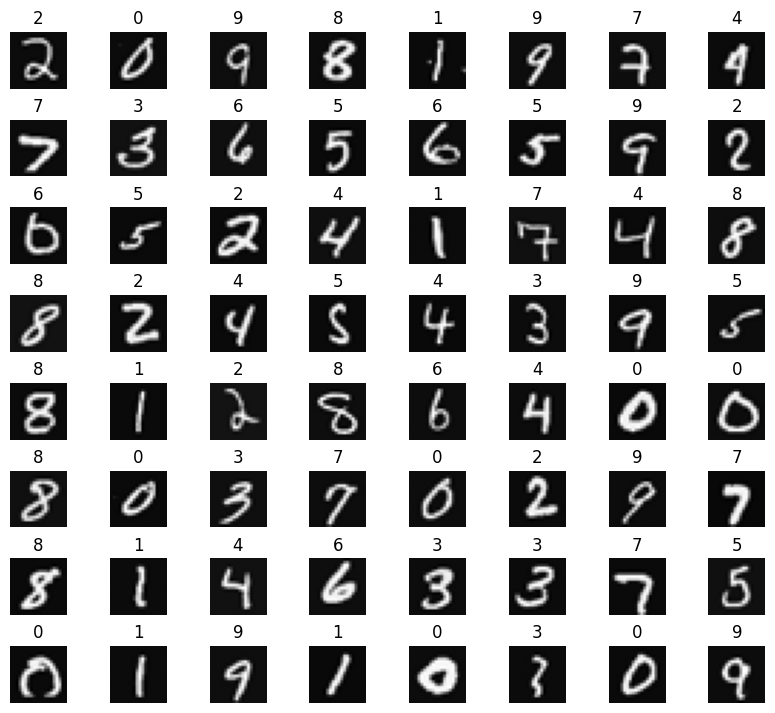

In [10]:
fig, ax = plt.subplots(8,8,figsize=(8,8))

m = X.shape[0]
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i,ax in enumerate(ax.flat):
    random_index = np.random.randint(m)
    random_shaped_row = X[random_index].reshape((20,20)).T
    ax.imshow(random_shaped_row,cmap="gray")
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

In [11]:
tf.random.set_seed(1234) # for consistent results

model = Sequential(
    [
        tf.keras.layers.InputLayer((400,)),
        Dense(units=25,activation="relu",name="L1"),
        Dense(units=15,activation="relu",name="L2"),
        Dense(units=10,activation="linear",name="L3")
    ]
)

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ L1 (Dense)                           │ (None, 25)                  │          10,025 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L2 (Dense)                           │ (None, 15)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L3 (Dense)                           │ (None, 10)                  │             160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
l1 = model.get_layer("L1")
w1,b1 = l1.get_weights()

l2 = model.get_layer("L2")
w2,b2 = l2.get_weights()

l3 = model.get_layer("L3")
w3,b3 = l3.get_weights()

print(f"Layer1:\nw1 = {w1.shape} \nb1 = {b1.shape}")
print(f"Layer2:\nw2 = {w2.shape} \nb2 = {b2.shape}")
print(f"Layer3:\nw3 = {w3.shape} \nb3 = {b3.shape}")

Layer1:
w1 = (400, 25) 
b1 = (25,)
Layer2:
w2 = (25, 15) 
b2 = (15,)
Layer3:
w3 = (15, 10) 
b3 = (10,)


In [14]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001)
)

In [15]:
model.fit(
    X,y,
    epochs=40
)

Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9675
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7505
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4664
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3748
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3265
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2936
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2691
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2485
Epoch 9/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2311
Epoch 10/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2156
Epoch 11/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2024
Epoch 12/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1902
Epoch 13/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1795
Epoch 14/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1700
Epoch 15/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

Text(0.5, 1.0, '2')

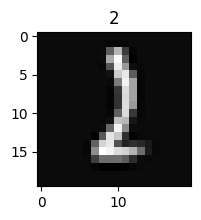

In [16]:
index = 1015
image_of_two = X[index].reshape((20,20)).T
plt.figure(figsize=(2,2))
plt.imshow(image_of_two,cmap="gray")
plt.title(y[index,0])

In [17]:
prediction = model.predict(X[index].reshape((1,400)))

print(prediction)
print(f"Largest Prediction Index: {np.argmax(prediction)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
[[ -8.777351    3.309413    6.319761    2.3504484 -13.22901    -9.033313
   -6.6899424   0.9052681  -3.3464203 -10.503101 ]]
Largest Prediction Index: 2


In [18]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[2.5878410e-07 4.5935970e-02 9.3224561e-01 1.7606776e-02 3.0172200e-09
  2.0034356e-07 2.0868356e-06 4.1499804e-03 5.9096405e-05 4.6073790e-08]]
Total of predictions: 1.000


In [19]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━

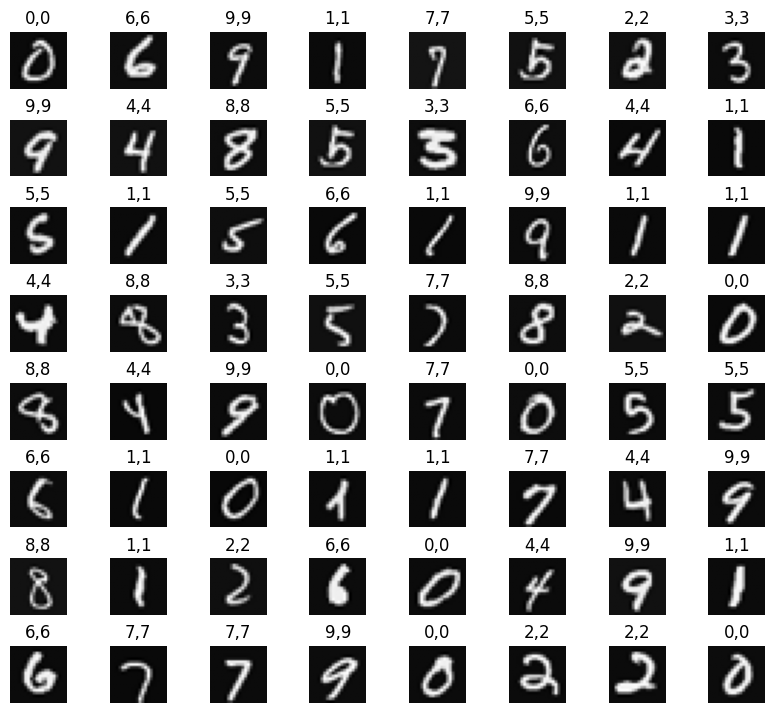

In [20]:
fig, ax = plt.subplots(8,8,figsize=(8,8))

m = X.shape[0]
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i,ax in enumerate(ax.flat):
    random_index = np.random.randint(m)
    random_shaped_row = X[random_index].reshape((20,20)).T
    ax.imshow(random_shaped_row,cmap="gray")

    prediction = model.predict(X[random_index].reshape((1,400)))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()

In [21]:
y_pred_prob = model.predict(X)  # shape: (num_samples, 10)
prediction_p = tf.nn.softmax(y_pred_prob)
y_pred = np.argmax(prediction_p, axis=1)  # shape: (num_samples,)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [22]:
y_true = y
# y_true = np.argmax(y, axis=1)
y_true

array([[0],
       [0],
       [0],
       ...,
       [9],
       [9],
       [9]], dtype=uint8)

In [23]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 99.58


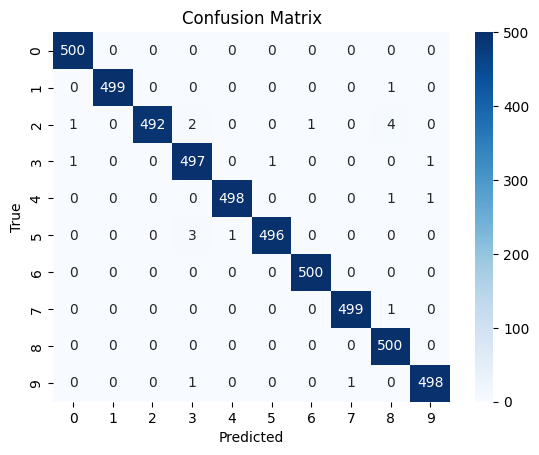

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500
           2       1.00      0.98      0.99       500
           3       0.99      0.99      0.99       500
           4       1.00      1.00      1.00       500
           5       1.00      0.99      0.99       500
           6       1.00      1.00      1.00       500
           7       1.00      1.00      1.00       500
           8       0.99      1.00      0.99       500
           9       1.00      1.00      1.00       500

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000

